In [1]:
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x
        
input_size = 13
hidden_size1 = 50
hidden_size2 = 100
output_size = 1

model = MLP(input_size, hidden_size1, hidden_size2, output_size)



In [2]:
# Dosya okuma
import pandas as pd
import numpy as np
from torch.utils.data import TensorDataset

train_test = r'/content/drive/MyDrive/cure_the_princess_train.csv'
test = r'/content/drive/MyDrive/cure_the_princess_test.csv'
validation = r'/content/drive/MyDrive/cure_the_princess_validation.csv'

data_train_test = pd.read_csv(train_test)
data_test = pd.read_csv(test)
data_validation_test = pd.read_csv(validation)

# son kısmı alıp drop ediyoruz geriye özellik kısmı kalıyor bunu da değişkene atıyoruz
# y traine atıyoruz x train ile doğruluğu kontrol ediyoruz

#train loader

y_train_test = data_train_test.iloc[:, -1:].values
x_train_test = data_train_test.iloc[:, :-1].values
x_train_test = torch.tensor(x_train_test, dtype=torch.float32)
y_train_test = torch.tensor(y_train_test, dtype=torch.float32)
train_data = TensorDataset(x_train_test, y_train_test)
train_loader = torch.utils.data.DataLoader(train_data, batch_size = 16)

# test loade

y_test = data_test.iloc[:, -1:].values
x_test = data_test.iloc[:, :-1].values
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
test_data = TensorDataset(x_test, y_test)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 16)

# valid loader
y_valid = data_validation_test.iloc[:, -1:].values
x_valid = data_validation_test.iloc[:, :-1].values
x_valid = torch.tensor(x_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32)
valid_data = TensorDataset(x_valid, y_valid)
valit_loader = torch.utils.data.DataLoader(valid_data, batch_size = 16)


In [3]:
learning_rate = 0.01
num_epochs = 25


num_hidden_neuron = 5000

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


for epoch in range(num_epochs):

    train_loss = 0.0
    train_count = 0.0
    for inputs, labels in train_loader:

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_count += 1.0
        train_loss += loss.item()

    print("Epoch", epoch, "Training loss", train_loss/train_count)

print('Finished Training')

Epoch 0 Training loss 0.6879835253274893
Epoch 1 Training loss 0.45451166358175155
Epoch 2 Training loss 0.3740397825648513
Epoch 3 Training loss 0.323237748085698
Epoch 4 Training loss 0.2885535824336583
Epoch 5 Training loss 0.26609954671769204
Epoch 6 Training loss 0.24673110897405237
Epoch 7 Training loss 0.23167090320700331
Epoch 8 Training loss 0.21844872464484807
Epoch 9 Training loss 0.20651234662796877
Epoch 10 Training loss 0.19634966981373256
Epoch 11 Training loss 0.1876558001282849
Epoch 12 Training loss 0.1792678247335591
Epoch 13 Training loss 0.17187328773397434
Epoch 14 Training loss 0.16500236343922495
Epoch 15 Training loss 0.15919345112729677
Epoch 16 Training loss 0.15300321649712853
Epoch 17 Training loss 0.1472938071842058
Epoch 18 Training loss 0.14274496113574958
Epoch 19 Training loss 0.13763309626168088
Epoch 20 Training loss 0.1332169443227445
Epoch 21 Training loss 0.12851924060171918
Epoch 22 Training loss 0.12465214481742322
Epoch 23 Training loss 0.12085

Epoch 0 Training loss 0.11327974686894236 Validation Loss : 0.1690218821167946
Epoch 1 Training loss 0.11026466234669655 Validation Loss : 0.16779531985521318
Epoch 2 Training loss 0.10688937010974446 Validation Loss : 0.16631159223616124
Epoch 3 Training loss 0.1034713754241791 Validation Loss : 0.16418480779975653
Epoch 4 Training loss 0.10075941311690627 Validation Loss : 0.1639940544962883
Epoch 5 Training loss 0.09772988007981566 Validation Loss : 0.16428737062960863
Earlystopping Patience Counter: 1
Epoch 6 Training loss 0.09527253951948089 Validation Loss : 0.16317803505808115
Epoch 7 Training loss 0.0919602563769757 Validation Loss : 0.16382627449929715
Earlystopping Patience Counter: 1
Epoch 8 Training loss 0.08980057460456332 Validation Loss : 0.1625410681590438
Epoch 9 Training loss 0.08705895358130714 Validation Loss : 0.16288846228271722
Earlystopping Patience Counter: 1
Epoch 10 Training loss 0.08421881638373001 Validation Loss : 0.16134248115122318
Epoch 11 Training loss

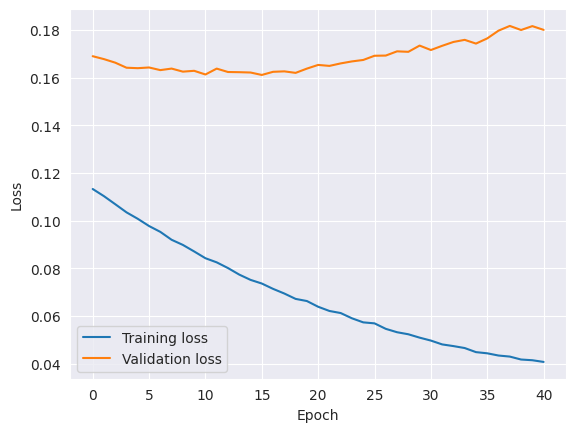

Finished Training


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
learning_rate = 0.01
num_epochs = 100
patience = 25

torch.manual_seed(190401071)
num_hidden_neuron = 5000

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

list_train_loss, list_val_loss = [], []

best_val_loss = None

patience_counter = 0
for epoch in range(num_epochs):

  train_loss = 0.0
  train_count = 0.0
  for inputs, labels in train_loader:

    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    train_count += 1.0
    train_loss += loss.item()

  val_loss = 0.0
  with torch.no_grad():
    model.eval()
    for inputs, labels in valit_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()

  model.train()

  train_loss /= train_count
  val_loss /= len(valit_loader)

  print("Epoch", epoch, "Training loss", train_loss,"Validation Loss :",val_loss)

  list_train_loss.append(train_loss)
  list_val_loss.append(val_loss)

  val_score = val_loss
  if best_val_loss is None:
    best_val_loss = val_score 
    torch.save(model.state_dict(), "checkpoint.pt")
  elif best_val_loss < val_score:
    patience_counter += 1
    print("Earlystopping Patience Counter:",patience_counter)
    if patience_counter == patience:
        break
  else:
    best_val_loss = val_score
    torch.save(model.state_dict(), "checkpoint.pt")
    patience_counter = 0

sns.set_style("darkgrid")
plt.plot(list_train_loss, label="Training loss")
plt.plot(list_val_loss, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


print('Finished Training')

In [10]:
from torcheval.metrics.functional import multiclass_f1_score
from torcheval.metrics.functional import multiclass_accuracy
import numpy
model.load_state_dict(torch.load('checkpoint.pt'))

predictions = []
ground_truths = []

model.eval()
with torch.no_grad():
  for inputs,masks in test_loader:
    outputs = model(inputs)
    _,predicted = torch.max(outputs.data,1)
    predictions.extend(predicted.tolist())
    ground_truths.extend(masks.tolist())

ground_truths = torch.tensor(ground_truths)
predictions = torch.tensor(predictions)
ground_truths = ground_truths.squeeze()

f1_score = multiclass_f1_score(predictions,ground_truths.to(torch.int64),num_classes=2,average='macro')
accuracy = multiclass_accuracy(predictions,ground_truths)

print("F1-Score: {:.4f}\nAccuracy: {:.4f}".format(f1_score,accuracy))


F1-Score: 0.3322
Accuracy: 0.4974


In [9]:
model.load_state_dict(torch.load('checkpoint.pt'))
model.eval()
predicts =[]
real_labels = list()
with torch.no_grad():
  for inputs,label in test_loader:
    outputs = model(inputs)
    _,predict = torch.max(outputs.data,1)
    predicts.extend(predict.tolist())
    real_labels.extend(label.tolist())


from sklearn.metrics import f1_score,accuracy_score,classification_report
print("Accuracy score of this model: {}".format(accuracy_score(real_labels,predicts)))
print(classification_report(real_labels,predicts))


Accuracy score of this model: 0.49740932642487046
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.66       384
         1.0       0.00      0.00      0.00       388

    accuracy                           0.50       772
   macro avg       0.25      0.50      0.33       772
weighted avg       0.25      0.50      0.33       772



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
